# Regression in R

In [2]:
# Support Functions and Datasets for Venables and Ripley's MASS
library(MASS)

# Data sets used in the book.
library(ISLR)

## Simple Linear Regression

In [3]:
# See name of variables
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [4]:
# Ask for help on boston to see more detail
?Boston

Boston                  package:MASS                   R Documentation

_H_o_u_s_i_n_g _V_a_l_u_e_s _i_n _S_u_b_u_r_b_s _o_f _B_o_s_t_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     The 'Boston' data frame has 506 rows and 14 columns.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     This data frame contains the following columns:

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full

In [5]:
# A formula with the lhs being the dependent and rhs independent variables
formula <- medv ~ lstat

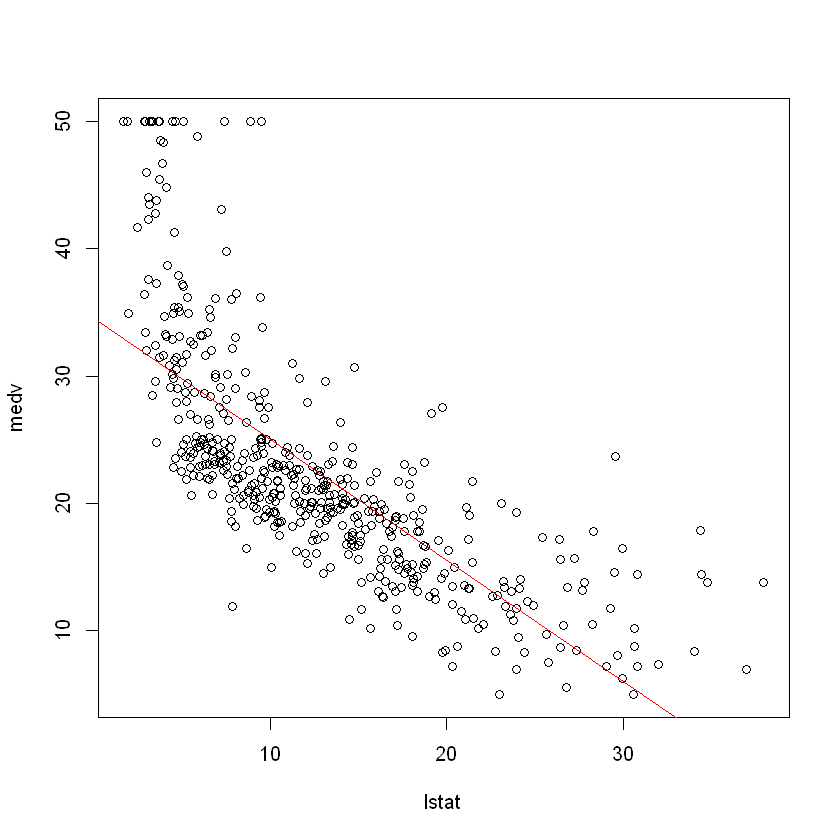

In [6]:
# Plot medv and lstat variables from the DF Boston
plot(formula, data = Boston)

# Create a linear model for our formula.
fit1 <- lm(formula, data = Boston)

# Add the linear model fit to the plot
abline(fit1, col = "red")

In [7]:
# Print lm fit for a brief summary.
fit1


Call:
lm(formula = formula, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [8]:
# Print more detailed summary of fit.
summary(fit1)


Call:
lm(formula = formula, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [9]:
# See components and details of fitting the model.
names(fit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [10]:
# Compute confidence intervals for the fit.
confint(fit1)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [11]:
# Predict, with 3 new values for lstat. Also ask for a confidence interval.
predict(fit1, data.frame(lstat = c(4, 10, 15)), interval = "confidence")

,fit,lwr,upr
1,30.75364,29.90022,31.60707
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


## Multiple Linear Regression

In [12]:
# Fit, linear model with lstat and age
fit2 <- lm(medv ~ lstat + age, data = Boston)
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [13]:
# Fit, linear model with response medv and all other predictors
# in the Boston DF except medv...
fit3 <- lm(medv ~ ., Boston)
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

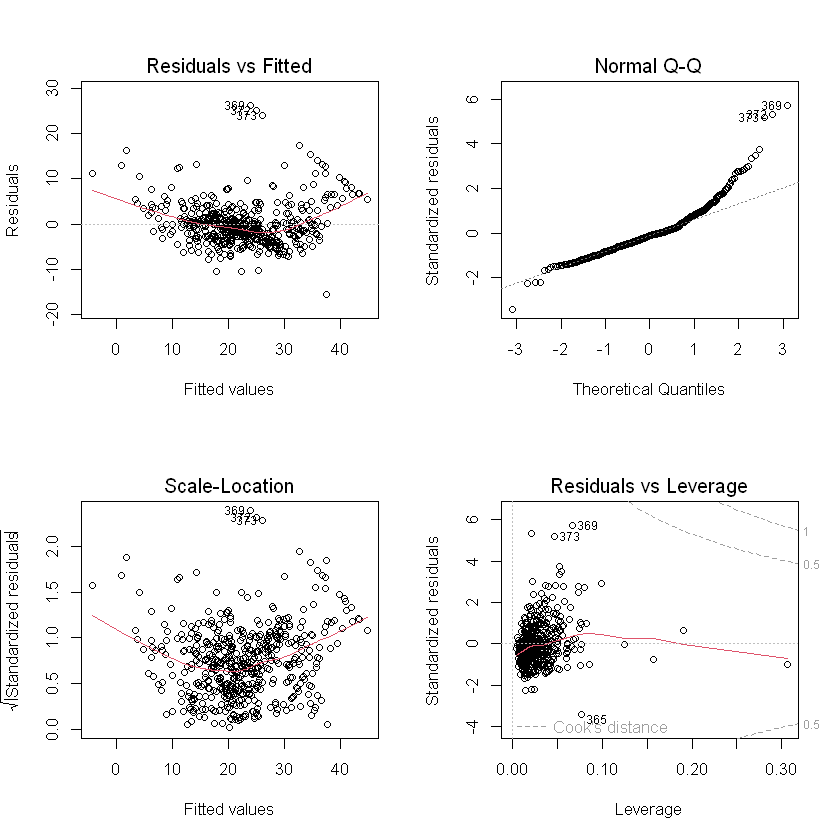

In [15]:
# 2x2 Plot
par(mfrow = c(2, 2))
plot(fit3)


In [16]:
# Nothing on the left means use the same response,
# dot means whatever the model was in fit 3,
# -age means remove age and -indus means remove indus
fit4 <- update(fit3, ~ . - age - indus)
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

## Nonlinear terms and Interactions

In [17]:
# * means interaction between lstat and age.
fit5 <- lm(medv ~ lstat * age, Boston)
summary(fit5)



Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [20]:
# I() identity function protects variable
# explicitly put in quadratic term: the square of lstat.
fit6 <- lm(medv ~ lstat + I(lstat^2), Boston)

# Both coefficients are strongly significant, the linear and the quadratic.
summary(fit6)



Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 5):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 6):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn


The following objects are masked from Boston (pos = 7):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn




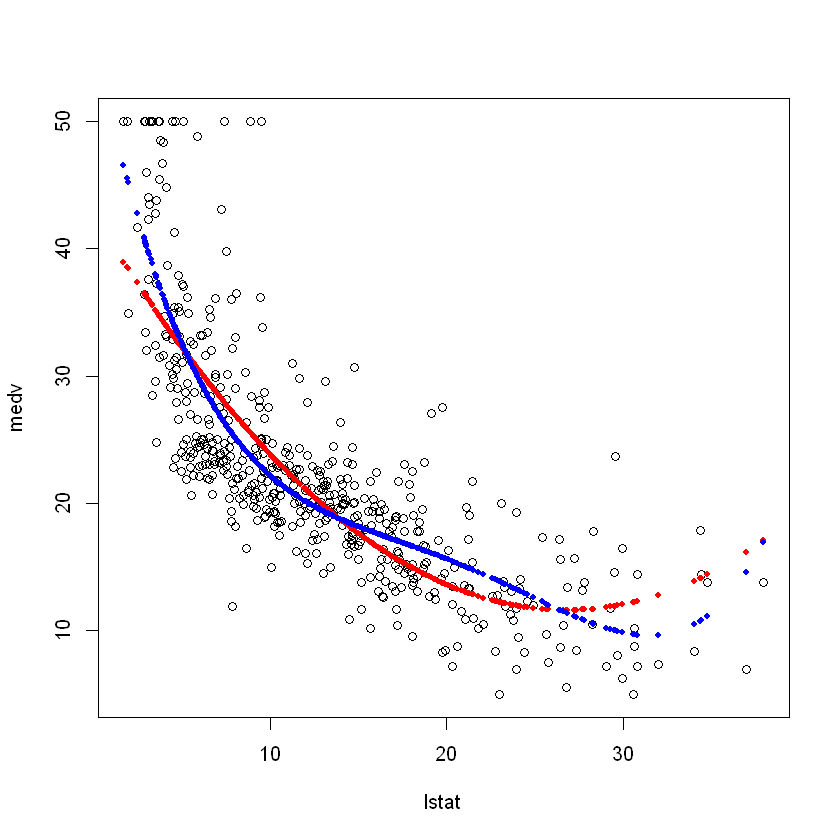

In [30]:
# Makes named variables from the DF available in our dataspace.
attach(Boston)

# Go back to single plot.
par(mfrow = c(1, 1))
plot(medv ~ lstat)

# Get the fitted values from our quadratic fit
# and include them in the plot.
# color red and plotting character 20.
points(lstat, fitted(fit6), col = "red", pch = 20)

# There's an easier way to fit polynomials in R.
# Fit as a polynomial of degree 4 in lstat.
fit7 <- lm(medv ~ poly(lstat, 4))
# Getting a little bit too wiggly and overfitting the data
# especially on the right side of the tail.
points(lstat, fitted(fit7), col = "blue", pch = 20)

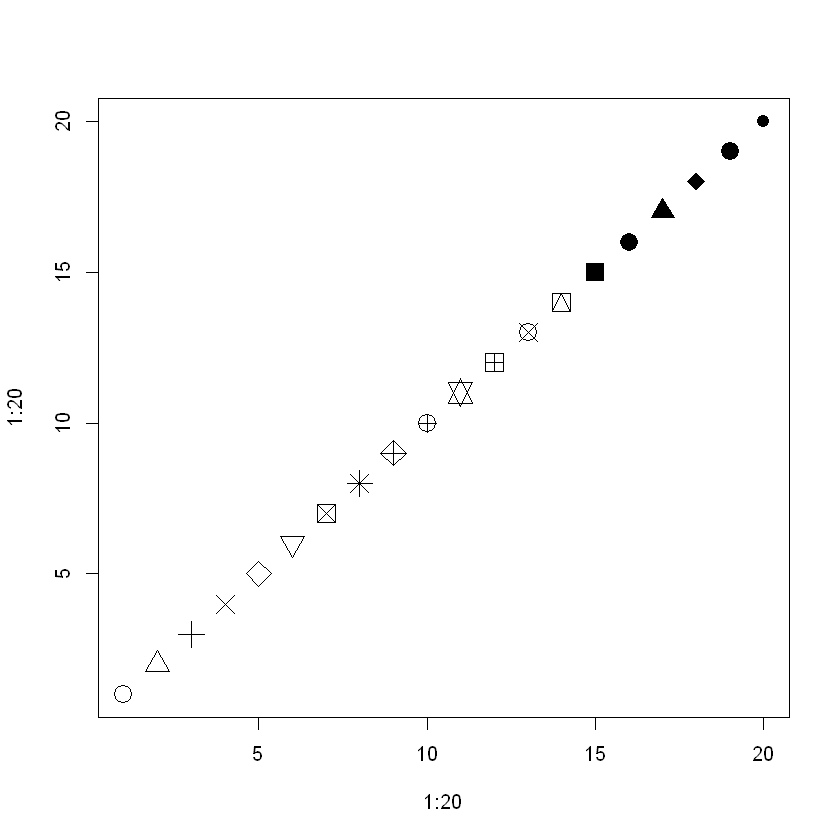

In [33]:
# See 20 plotting characters.
# cex=2 means double the size of the plotting characters.
plot(1:20, 1:20, pch = 1:20, cex = 2)

## Qualitative Predictors

In [35]:
# Opens up the DF in the data editor.
fix(Carseats)
# Study on children't carseats.
names(Carseats)
# Gives you information about each variable in the DF.
# Quantitative vs Qualitative variables show different data.
summary(Carseats)

In [42]:
# Everything in the DF but Sales plus
# interactions between income and advertising plus
# interactions between age and price.
fit1 <- lm(Sales ~ . + Income:Advertising + Age:Price, Carseats)

# Income:Advertising appears to be strongly significant due to P-value but
# Age:Price does not.
summary(fit1)



Call:
lm(formula = Sales ~ . + Income:Advertising + Age:Price, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [49]:
# ShelveLoc was a qualitative variable
# Contrasts shows you how R will code that variable
# when it's put in a linear model.
# In this case it's a 3 level vector so it puts in 2 dummy variables
# Bad is not good nor medium so it's 0 on both.
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


## Writing R Functions

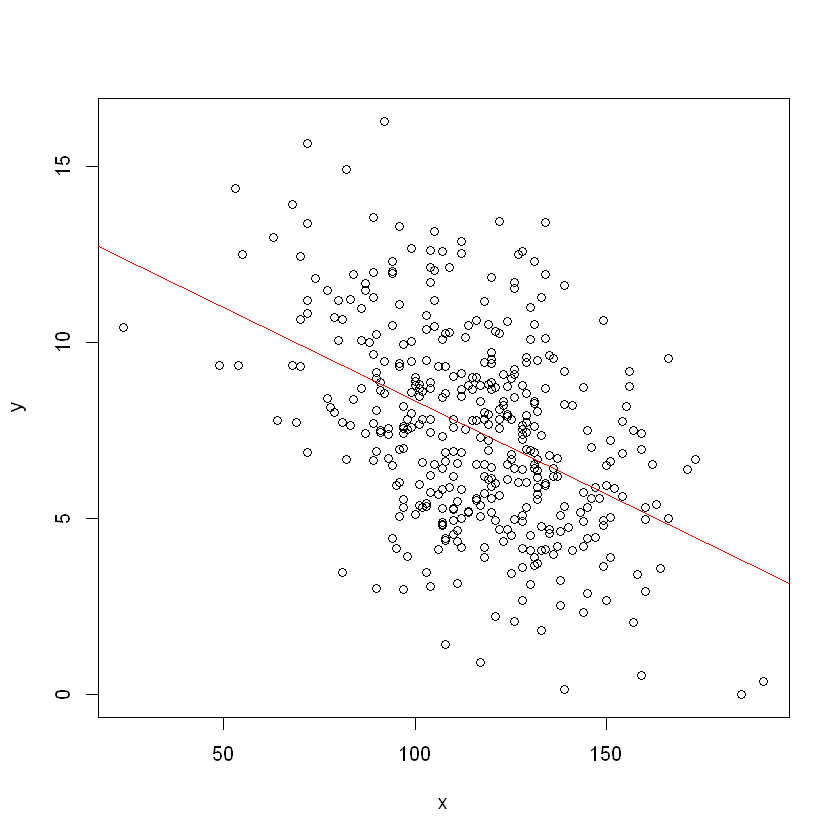

In [52]:
# Our own function to fit, plot, and abline.
regplot <- function(x, y) {
    fit <- lm(y ~ x)
    plot(x, y)
    abline(fit, col = "red")
}

# Let's try it out.
attach(Carseats)
regplot(Price, Sales)

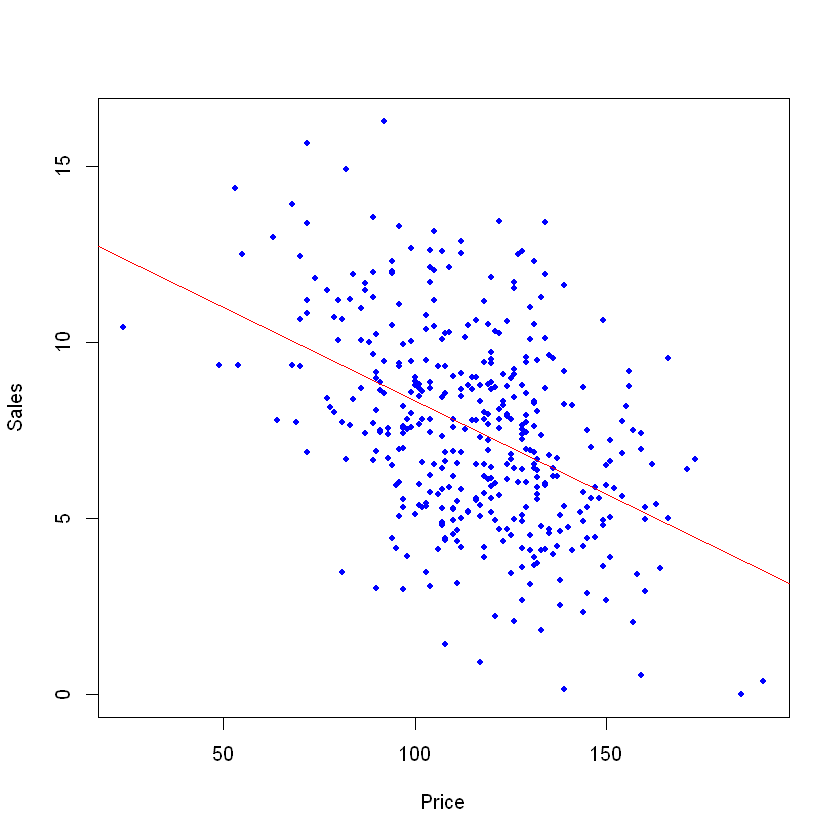

In [54]:
# Let's make our function more useful...
# ... is varargs or unnamed arguments in order.
regplot <- function(x, y, ...) {
    fit <- lm(y ~ x)
    plot(x, y, ...)
    abline(fit, col = "red")
}

# Try it out.
regplot(Price, Sales, xlab = "Price", ylab = "Sales", col = "blue", pch = 20)
